## 1. Importing packages

In [1]:
#standard
import numpy as np
import pandas as pd
import datetime
import time
from math import ceil
from itertools import combinations

#math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import math
import scipy as sc
from scipy import stats
from scipy.spatial import distance

#sklearn normalization/scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

#sklearn encoders
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors,LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

#sklearn prediction/trainings

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score

#Feature Selecion
import phik
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import category_encoders as ce


#visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.manifold import TSNE
import graphviz
from tqdm import tqdm

#sompy
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

#sklearn classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import BaggingClassifier
#Stacking
from mlens.ensemble import SuperLearner 

#sklearn metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, f1_score,recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, plot_roc_curve

#Cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#reporting
import pandas_profiling

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

## 2. Business Plan

## 2.1 Business Situation

Hotel chain C, a chain with resort and city hotels in Portugal, isn't any different than other independent and
non-independent hotel chains. Hotel chain C was severely impacted by **cancellations, representing almost 28% in H1 and almost 42% in H2**, as shown in the table below. For this reason, Michael, Revenue Manager Director of hotel chain C, decided to **limit the number of rooms sold with restrictive cancellation policies**. To balance that decision, Michael implemented a more aggressive overbooking policy. However, the latter started to generate costs.
To counterbalance those costs, Michael softened the overbooking policy, which in turn also revealed to be not good. The less aggressive overbooking policy resulted in the hotel having inventory not sold, even on high demand dates.

| Hotel | Metric       | Not Canceled        | Canceled            | Total              |
|-------|--------------|---------------------|---------------------|--------------------|
| H1    | Bookings     | 28,938 (72.2%)      | 11,122 (27.8%)      | 40,060 (100%)      |
| H1    | Room Revenue | 11,601,850€ (66.5%) | 5,842,177€ (33.5%)  | 17,444,028€ (100%) |
| H2    | Bookings     | 46,228 (58.3%)      | 33,102 (41.7%)      | 79,330 (100%)      |
| H2    | Room Revenue | 14,394,410€ (56.9%) | 10,885,060€ (43.1%) | 25,279,470€ (100%) |

Concerned about the increasingly negative impact caused by cancellations,
Michael hired a consultant to evaluate the possibility of developing
predictive models to predict the net demand for their hotels, specifically in
a city hotel (H2). The hotel provided the consultant a dataset with the
bookings made in that hotel, which were due to **arrive between July 1, 2015,
and August 31, 2017** [^3].

To reduce the uncertainty about demand, Michael wants to **implement prediction
models** to allow the chain’s hotels to forecast net demand based on
reservations on-the-books. With these models' estimations, Michael expects to
implement **better pricing and overbooking policies and identify bookings with
high likelihood of canceling**. Identifying those bookings could allow the
hotels to try to contact those bookings’ customers and make offers to try to
prevent cancellation (e.g., dinner, car parking, spa treatments, discounts, or
other perks). Michael's goal is to reduce cancellations to a rate of 20%.

## 2.2 Data mining goals

- EDA;
- Data Preparation(Data cleaning, data engineering, data normalization);
- Clusterization of best seasons(time)/patterns of cancelled booking;
- Predicting models(more machine learning oriented) algorithms to help make predictions about cancelled bookings and prices;

## 2.3 Business Goals

The company goals are:
- More attractive price policies;
- Minimize cost/number of cancelled bookings
- Identifying bookings that could allow the manangement to try to contact customers and make offers to try to prevent cancellation;


End goals:
- Minimize cancelled bookings in other to dont lose possibles bookings --> increase sales
- Cancellation Rate (20%)




## 3.Data Understanding 

### 3.1 Dataset description

| Name                        | Meaning                                                                                                                                                                                                                                                          |
|-----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ADR                         | Average Daily Rate                                                                                                                                                                                                                                               |
| Adults                      | Number of adults                                                                                                                                                                                                                                                 |
| Agent                       | ID of the travel agency that made the booking                                                                                                                                                                                                                    |
| ArrivalDateDayOfMonth       | Day of the month of the arrival date                                                                                                                                                                                                                             |
| ArrivalDateMonth            | Month of arrival date with 12 categories:  “January” to “December”                                                                                                                                                                                               |
| ArrivalDateWeekNumber       | Week number of the arrival date                                                                                                                                                                                                                                  |
| ArrivalDateYear             | Year of the arrival date                                                                                                                                                                                                                                         |
| AssignedRoomType            | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
| Babies                      | Number of babies                                                                                                                                                                                                                                                 |
| BookingChanges              | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation                                                                                                                 |
| Children                    | Number of children                                                                                                                                                                                                                                               |
| Company                     | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons                                                                                                               |
| Country                     | Country of origin. Categories are represented in the ISO 3155-3:2013 format                                                                                                                                                                                      |
| CustomerType                | Type of booking, assuming one of four possible categories (presented below)                                                                                                                                                                                      |
| DaysInWaitingList           | Number of days the booking was in the waiting list before it was confirmed to the customer                                                                                                                                                                       |
| DepositType                 | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories (presented)                                                                                                                                     |
| DistributionChannel         | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                                |
| IsCanceled                  | Value indicating if the booking was canceled (1) or not (0)                                                                                                                                                                                                      |
| IsRepeatedGuest             | Value indicating if the booking name was from a repeated guest (1) or not (0)                                                                                                                                                                                    |
| LeadTime                    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date                                                                                                                                                           |
| MarketSegment               | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                   |
| Meal                        | Type of meal booked. Categories are presented in standard hospitality meal packages (presented below)                                                                                                                                                            |
| PreviousBookingsNotCanceled | Number of previous bookings not cancelled by the customer prior to the current booking                                                                                                                                                                           |
| PreviousCancellations       | Number of previous bookings that were cancelled by the customer prior to the current booking                                                                                                                                                                     |
| RequiredCarParkingSpaces    | Number of car parking spaces required by the customer                                                                                                                                                                                                            |
| ReservationStatus           | Reservation last status, assuming one of three categories (presented below)                                                                                                                                                                                      |
| ReservationStatusDate       | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel                                                         |
| ReservedRoomType            | Code of room type reserved. Code is presented instead of designation for anonymity reasons                                                                                                                                                                       |
| StaysInWeekendNights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                                                                                                                                                    |
| StaysInWeekNights           | Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel                                                                                                                                                                          |
| TotalOfSpecialRequests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                                                                                                                                                                    |


**CustomerType** categories:
- Contract - when the booking has an allotment or other type of
- contract associated to it;
- Group – when the booking is associated to a group;
- Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
- Transient-party – when the booking is transient, but is associated to at least other transient booking

**DepositType** categories:
- No Deposit – no deposit was made;
- Non Refund – a deposit was made in the value of the total stay cost;
- Refundable – a deposit was made with a value under the total cost of stay.

**Meal** categories:
- Undefined/SC – no meal package;
- BB – Bed & Breakfast;
- HB – Half board (breakfast and one other meal – usually dinner);
- FB – Full board (breakfast, lunch and dinner)

**ReservationStatus** categories:
- Canceled – booking was canceled by the customer;
- Check-Out – customer has checked in but already departed;
- No-Show – customer did not check-in and did inform the hotel of the reason why

### 3.2 Collect initial data

In [2]:
df = pd.read_csv(r'H2.csv')

In [3]:
df_features = df.columns.to_list()
df_features 

['IsCanceled',
 'LeadTime',
 'ArrivalDateYear',
 'ArrivalDateMonth',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'ReservedRoomType',
 'AssignedRoomType',
 'BookingChanges',
 'DepositType',
 'Agent',
 'Company',
 'DaysInWaitingList',
 'CustomerType',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'ReservationStatus',
 'ReservationStatusDate']

In [4]:
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df[['Adults',
 'Children',
 'Babies',
 'Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'ReservedRoomType',
 'AssignedRoomType',
 'BookingChanges',]]

,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges
0,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0
1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0
2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0
3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0
4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0
79326,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0
79327,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0
79328,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0


Possible approaches after checking data:
- ArrivalDateMonth to respective month number(January --> 1);
- ArrivalDateWeekNumber --> 1 - 54 (?);
- Meal to ordinal variable since price will be relative to this ( 0 --> Breakfast; 1--> HB; 2-->FB);
- Country might get dropped earlier but we could do a geographical approach for final conclusion;
- MarketSegment(Offline --> 0 / Online --> 1);
- DistributionChannel(TO --> 0 / TA --> 1);
- ReservedRoomType(probably some label encoder(?));
- AssignedRoomType --> if AssignedRoomType == ReservedRoomType turns 1 ; otherwise 0;
- DepositType(NoDeposit --> 0; Refundable --> 1; Non refund --> 2)
- Agent probably discard or to use later
- Company --> check null/missing values and then decide;
- ADR --> Price
- ReservationStatus --> Canceled(0);No-Show(1);Check-Out(2);
- ReservationStatusDate --> It's already on leadtime;

### 3.3 Data Preparation

#### 3.3.1 Missing Values

In [6]:
# Check missing values
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

**country**

In [7]:
df[(df.Country.isna() == True)]

NumExpr defaulting to 4 threads.


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
4831,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4832,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4833,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4834,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4835,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4836,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4837,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4838,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4839,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4841,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16


After watching the data relative to this missing values, iit's possible to conclude that:
- Entrances should be relative to a group of people where their booking the same:
 - [4831,4845]
 - [21184,21189]
 - [25847,25850]

**children**

In [8]:
df[(df.Children.isna() == True)]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
540,1,2,2015,August,32,3,1,0,2,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
607,1,1,2015,August,32,5,0,2,2,NaN,...,No Deposit,14,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
619,1,1,2015,August,32,5,0,2,3,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
1100,1,8,2015,August,33,13,2,5,2,NaN,...,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [9]:
df['Children'] = df['Children'].fillna(df['Children'].mean())

In [10]:
len(df[(df.Children.isna() == True)])

0

#### 3.3.2 Duplicated data

In [11]:
# Check duplicated observations
#print(len(df.loc[df.duplicated(keep='first'), :]))

In [12]:
#df.loc[df.duplicated(keep='first')]

In [13]:
#data = df.drop(df.loc[df.duplicated(keep='first'), :].index, axis = 0)
data = df

Suggestion:Dropping all same id reservations(p.e a family reservation)

#### 3.3.3 Inconsistencies

In [14]:
def month_name(x):
    datetime_object = datetime.datetime.strptime(x, "%B")

    month_number = datetime_object.month

    return month_number

data['ArrivalDateMonth'] = data['ArrivalDateMonth'].apply(month_name)

In [15]:
data['Arrival_date'] = pd.to_datetime(data[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str).agg('-'.join, axis=1))

In [16]:
data[(data.ReservationStatus == 'Canceled') & (data['Arrival_date'] < data['ReservationStatusDate'])]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Arrival_date


Checking if there were any clients that canceled the reservation but still went 


#### 3.3.3 Feature Engineering

In [17]:
df = data[['ADR','IsCanceled','DepositType','LeadTime','Meal','StaysInWeekendNights','StaysInWeekNights', 
         'Adults', 'Children','Babies', 'CustomerType','Country',#type of people(family, single, friends)
         'MarketSegment', 'DistributionChannel','Agent','Company', # Travel Agents or Travel Operators
         'IsRepeatedGuest', 'PreviousCancellations','PreviousBookingsNotCanceled', # Historical data
         'ReservedRoomType', 'AssignedRoomType','BookingChanges','RequiredCarParkingSpaces','TotalOfSpecialRequests', # requests
         'DaysInWaitingList','ReservationStatus', 'ReservationStatusDate','Arrival_date' # reservation
    ]]

In [18]:
df.reset_index(inplace = True)

In [19]:
df.rename(columns = {'index':'id'}, inplace = True)

In [20]:
df

,id,ADR,IsCanceled,DepositType,LeadTime,Meal,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,RequiredCarParkingSpaces,TotalOfSpecialRequests,DaysInWaitingList,ReservationStatus,ReservationStatusDate,Arrival_date
0,0,0.00,0,No Deposit,6,HB,0,2,1,0.0,...,0,A,A,0,0,0,0,Check-Out,2015-07-03,2015-07-01
1,1,76.50,1,No Deposit,88,BB,0,4,2,0.0,...,0,A,A,0,0,1,0,Canceled,2015-07-01,2015-07-01
2,2,68.00,1,No Deposit,65,BB,0,4,1,0.0,...,0,A,A,0,0,1,0,Canceled,2015-04-30,2015-07-01
3,3,76.50,1,No Deposit,92,BB,2,4,2,0.0,...,0,A,A,0,0,2,0,Canceled,2015-06-23,2015-07-01
4,4,76.50,1,No Deposit,100,BB,0,2,2,0.0,...,0,A,A,0,0,1,0,Canceled,2015-04-02,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,79325,96.14,0,No Deposit,23,BB,2,5,2,0.0,...,0,A,A,0,0,0,0,Check-Out,2017-09-06,2017-08-30
79326,79326,225.43,0,No Deposit,102,BB,2,5,3,0.0,...,0,E,E,0,0,2,0,Check-Out,2017-09-07,2017-08-31
79327,79327,157.71,0,No Deposit,34,BB,2,5,2,0.0,...,0,D,D,0,0,4,0,Check-Out,2017-09-07,2017-08-31
79328,79328,104.40,0,No Deposit,109,BB,2,5,2,0.0,...,0,A,A,0,0,0,0,Check-Out,2017-09-07,2017-08-31


**Market Segmentation**

In [21]:
df['MarketSegment'].unique()

array(['Offline TA/TO', 'Online TA', 'Groups', 'Complementary', 'Direct',
       'Corporate', 'Undefined', 'Aviation'], dtype=object)

In [22]:
df.DistributionChannel.unique()

array(['TA/TO', 'Direct', 'Undefined', 'Corporate', 'GDS'], dtype=object)

**ReservedRoomType**

In [23]:
df.ReservedRoomType.unique()

array(['A               ', 'B               ', 'D               ',
       'F               ', 'E               ', 'G               ',
       'C               ', 'P               '], dtype=object)

In [24]:
df['ReservedRoomType'] = df['ReservedRoomType'].str.replace(" ","")

In [25]:
df[['ADR','ReservedRoomType']].groupby(['ReservedRoomType']).mean()

,ADR
ReservedRoomType,
A,96.249209
B,90.321955
C,85.482143
D,131.461437
E,156.796864
F,189.259140
G,201.800496
P,0.000000


In [26]:
df[['ADR','AssignedRoomType']].groupby(['AssignedRoomType']).mean()

,ADR
AssignedRoomType,
A,96.655321
B,93.871163
C,100.501925
D,121.655856
E,143.944862
F,178.651526
G,184.473986
K,53.698889
P,0.000000


In [27]:
def reservedroom(x):
    if str(x) == 'A':
        return 3
    elif str(x) == 'B':
        return 2
    elif str(x) == 'C':
        return 4
    elif str(x) == 'D':
        return 5
    elif str(x) == 'E':
        return 6
    elif str(x) == 'F':
        return 7
    elif str(x) == 'G':
        return 8
    elif str(x) == 'K':
        return 1
    else:
        return 0
df['ReservedRoomType'] = df['ReservedRoomType'].apply(reservedroom).astype(int)

**AssignedRoomType**

In [28]:
df['AssignedRoomType'] = df['AssignedRoomType'].str.replace(" ","")

In [29]:
df['AssignedRoomType'] = df['AssignedRoomType'].apply(reservedroom).astype(int)

In [30]:
df['QualityRoomChange'] = df['AssignedRoomType'] - df['ReservedRoomType']

In [31]:
df['QualityRoomChange'].unique()

array([ 0,  4, -4,  2,  5, -1,  3, -2, -3, -5,  1,  6, -6, -7])

**DepositType**

In [32]:
df['DepositType'] = df['DepositType'].str.replace(" ","")

In [33]:
df['DepositType'].unique()

array(['NoDeposit', 'NonRefund', 'Refundable'], dtype=object)

**Agent**

In [34]:
df['Agent'] = df['Agent'].str.replace(" ","")

In [35]:
df['Agent'] = df['Agent'].apply(lambda x: '0' if x == 'NULL' else x)

In [36]:
df.Agent.value_counts(ascending=False).head(30)

9      31955
0       8131
1       7137
14      3640
7       3539
6       2683
28      1666
3       1308
8       1236
37      1230
19      1061
21       875
229      786
83       696
29       679
12       578
85       554
20       540
30       484
27       450
22       382
56       375
86       338
58       335
119      304
26       295
34       293
44       292
11       290
138      287
Name: Agent, dtype: int64

In [37]:
feature_to_encode = ['Agent']
df_WoE = df.copy()

In [38]:
# Initia the encoder model
WoEEncoder = ce.woe.WOEEncoder()
# fit the train data
WoEEncoder.fit(df[feature_to_encode],df['IsCanceled'])

WOEEncoder(cols=['Agent'])

In [39]:
df_WoE[feature_to_encode] = WoEEncoder.transform(df[feature_to_encode])

In [40]:
# Save the encoded data to the main dataset
df[feature_to_encode] = df_WoE[feature_to_encode].astype(float)

In [41]:
df[(df.Agent > 0) & (df.IsCanceled == 1)]

,id,ADR,IsCanceled,DepositType,LeadTime,Meal,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,RequiredCarParkingSpaces,TotalOfSpecialRequests,DaysInWaitingList,ReservationStatus,ReservationStatusDate,Arrival_date,QualityRoomChange
14,14,86.00,1,NoDeposit,43,HB,0,2,2,0.0,...,3,3,0,0,0,0,Canceled,2015-06-29,2015-07-03,0
16,16,63.00,1,NoDeposit,43,HB,0,2,1,0.0,...,3,3,0,0,0,0,Canceled,2015-06-16,2015-07-03,0
19,19,63.00,1,NoDeposit,43,HB,0,2,1,0.0,...,3,3,0,0,0,0,Canceled,2015-06-29,2015-07-03,0
20,20,86.00,1,NoDeposit,43,HB,0,2,2,0.0,...,3,3,0,0,0,0,Canceled,2015-06-16,2015-07-03,0
68,68,63.75,1,NoDeposit,84,BB,0,1,2,0.0,...,3,3,0,0,0,0,Canceled,2015-06-30,2015-07-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42883,42883,80.00,1,NoDeposit,58,BB,0,2,1,0.0,...,3,3,0,0,0,0,Canceled,2016-01-07,2016-01-27,0
42884,42884,80.00,1,NoDeposit,58,BB,0,2,1,0.0,...,3,3,0,0,0,0,Canceled,2016-01-07,2016-01-27,0
42885,42885,80.00,1,NoDeposit,58,BB,0,2,1,0.0,...,3,3,0,0,0,0,Canceled,2016-01-07,2016-01-27,0
58749,58749,77.00,1,NoDeposit,0,BB,1,0,2,0.0,...,3,3,0,0,2,0,Canceled,2016-12-12,2016-12-12,0


In [42]:
def agent_transformer(x):
    if x > 0:
        return 1
    else:
        return 0

df['Agent'] = df['Agent'].apply(agent_transformer)

In [43]:
df.Agent.unique()

array([0, 1])

**Company**

In [44]:
df['Company'] = df['Company'].str.replace(" ","")
df['Company'].unique()

array(['NULL', '40', '45', '38', '9', '47', '49', '51', '48', '62', '67',
       '68', '84', '65', '91', '37', '8', '14', '174', '207', '179',
       '209', '219', '72', '221', '227', '153', '186', '218', '78', '253',
       '202', '216', '275', '277', '233', '280', '309', '321', '331',
       '93', '316', '85', '107', '350', '279', '334', '348', '405', '366',
       '365', '407', '242', '435', '150', '73', '428', '385', '418',
       '197', '409', '450', '452', '169', '466', '43', '115', '465',
       '329', '46', '76', '96', '358', '100', '108', '110', '81', '120',
       '116', '105', '101', '122', '11', '135', '137', '139', '144',
       '142', '127', '130', '143', '148', '140', '149', '163', '160',
       '180', '238', '183', '222', '203', '185', '217', '215', '193',
       '213', '224', '237', '230', '234', '35', '246', '245', '251',
       '255', '158', '258', '259', '260', '263', '411', '254', '272',
       '257', '271', '18', '106', '210', '273', '278', '71', '284', '292',
   

In [45]:
df['Company'] = df['Company'].apply(lambda x: '0' if x == 'NULL' else x)

In [46]:
df.Company.value_counts(ascending=False).head(30)

0      75641
40       924
67       267
45       250
153      215
219      141
233      114
174      113
51        86
242       61
348       59
38        51
280       48
91        48
197       47
68        46
218       42
169       39
202       38
238       33
148       33
62        32
385       30
365       28
221       27
72        27
46        26
418       25
227       24
179       24
Name: Company, dtype: int64

In [47]:
df[(df.Company != '0') & (df.IsCanceled == 1)]

,id,ADR,IsCanceled,DepositType,LeadTime,Meal,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,RequiredCarParkingSpaces,TotalOfSpecialRequests,DaysInWaitingList,ReservationStatus,ReservationStatusDate,Arrival_date,QualityRoomChange
586,586,65.0,1,NoDeposit,1,BB,0,2,1,0.0,...,3,3,0,0,0,0,Canceled,2015-08-03,2015-08-04,0
598,598,6.0,1,NoDeposit,1,BB,0,1,1,0.0,...,3,3,0,0,0,0,Canceled,2015-08-04,2015-08-05,0
599,599,6.0,1,NoDeposit,1,BB,0,1,1,0.0,...,3,3,0,0,0,0,Canceled,2015-08-04,2015-08-05,0
637,637,60.0,1,NoDeposit,1,BB,0,3,1,0.0,...,3,3,0,0,0,0,Canceled,2015-08-04,2015-08-05,0
665,665,60.0,1,NoDeposit,1,BB,0,3,1,0.0,...,3,3,0,0,0,0,Canceled,2015-08-04,2015-08-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,68769,125.0,1,NoDeposit,25,BB,2,1,1,0.0,...,6,7,0,0,0,0,No-Show,2017-05-06,2017-05-06,1
71295,71295,65.0,1,NoDeposit,4,BB,1,0,1,0.0,...,3,3,0,0,0,0,Canceled,2017-06-05,2017-06-05,0
71864,71864,65.0,1,NoDeposit,7,BB,0,1,1,0.0,...,3,3,0,0,0,0,Canceled,2017-05-31,2017-05-31,0
71865,71865,65.0,1,NoDeposit,6,BB,1,0,1,0.0,...,3,5,0,0,0,0,No-Show,2017-07-17,2017-07-17,2


In [48]:
def company_transformer(x):
    if str(x) == '0':
        return 1
    else:
        return 0

df['Company'] = df['Company'].apply(company_transformer)


In [49]:
df.Company.unique()

array([1, 0])

there are 208 companies  and 224 Agents--> Usefulness: possibly performance of each one (?) | Lowest Cancelled % could lead to the best one

**ReservationStatus**

In [50]:
df['ReservationStatus'] = df['ReservationStatus'].str.replace(" ","")
df['ReservationStatus'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [51]:
def reservation_status(x):
    if str(x) == 'Canceled':
        return 0
    elif str(x) == 'No-Show':
        return 1
    elif str(x) == 'Check-Out':
        return 2
    else:
        return np.nan
df['ReservationStatus'] = df['ReservationStatus'].apply(reservation_status)

In [52]:
df['ReservationStatus'].unique()

array([2, 0, 1])

#### 3.3.4 Selecting data

In [53]:
target_variable = df[['id','IsCanceled']]
metric_data = df[[
                'id','ADR','LeadTime','DaysInWaitingList','StaysInWeekendNights','StaysInWeekNights',
                'Adults','Children','Babies',
                'PreviousCancellations','PreviousBookingsNotCanceled',
                'BookingChanges','TotalOfSpecialRequests','RequiredCarParkingSpaces',
                'QualityRoomChange'
                ]]
metric_features = metric_data.columns.to_list()
non_metric_data = df[[
                    'id','MarketSegment','Agent','Company', 'DistributionChannel','Meal','CustomerType',
                    'IsRepeatedGuest','ReservedRoomType','AssignedRoomType'
                    ]]

non_metric_features = df.columns.to_list()

In [54]:
target_variable

,id,IsCanceled
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
79325,79325,0
79326,79326,0
79327,79327,0
79328,79328,0


#### 3.3.4 Outliers Detection

In [55]:
metric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,79330.0,39664.500000,22900.742765,0.0,19832.25,39664.5,59496.75,79329.0
ADR,79330.0,105.304465,43.602954,0.0,79.20,99.9,126.00,5400.0
LeadTime,79330.0,109.735724,110.948526,0.0,23.00,74.0,163.00,629.0
DaysInWaitingList,79330.0,3.226774,20.870890,0.0,0.00,0.0,0.00,391.0
StaysInWeekendNights,79330.0,0.795185,0.885026,0.0,0.00,1.0,2.00,16.0
StaysInWeekNights,79330.0,2.182957,1.456416,0.0,1.00,2.0,3.00,41.0
Adults,79330.0,1.850977,0.509292,0.0,2.00,2.0,2.00,4.0
Children,79330.0,0.091370,0.372167,0.0,0.00,0.0,0.00,3.0
Babies,79330.0,0.004941,0.084323,0.0,0.00,0.0,0.00,10.0
PreviousCancellations,79330.0,0.079743,0.415472,0.0,0.00,0.0,0.00,21.0


**boxplottting**

In [56]:
def boxplotting(dataset,column_id,title):
    sns.set(style="whitegrid")

    # Prepare dataframe layout
    data = dataset.melt(column_id)
    plot_features = dataset.drop(column_id,1).columns
    
    #Prepare figure layout
    fig, axes = plt.subplots(1, len(plot_features), figsize=(32,10), constrained_layout=False)
    
    # Draw the boxplots
    for i in zip(axes, plot_features):
        sns.boxplot(x="variable", y="value", data=data.loc[data["variable"]==i[1]], ax=i[0])
        i[0].set_xlabel("",fontsize=30)
        
        i[0].set_ylabel("",fontsize=30)
        
    # Finalize the plot
    plt.suptitle(title, fontsize=25)
    sns.despine(bottom=True)

    plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) 

findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (Georgia_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 5

findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 4.05
findfont: score(<Font 'KacstTitleL' (KacstTitleL.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kinnari' (Kinnari-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (Verdana_Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Kalapi' (Kalapi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
find

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=25.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) 

findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (Georgia_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 5

findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 4.05
findfont: score(<Font 'KacstTitleL' (KacstTitleL.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kinnari' (Kinnari-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (Verdana_Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Kalapi' (Kalapi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
find

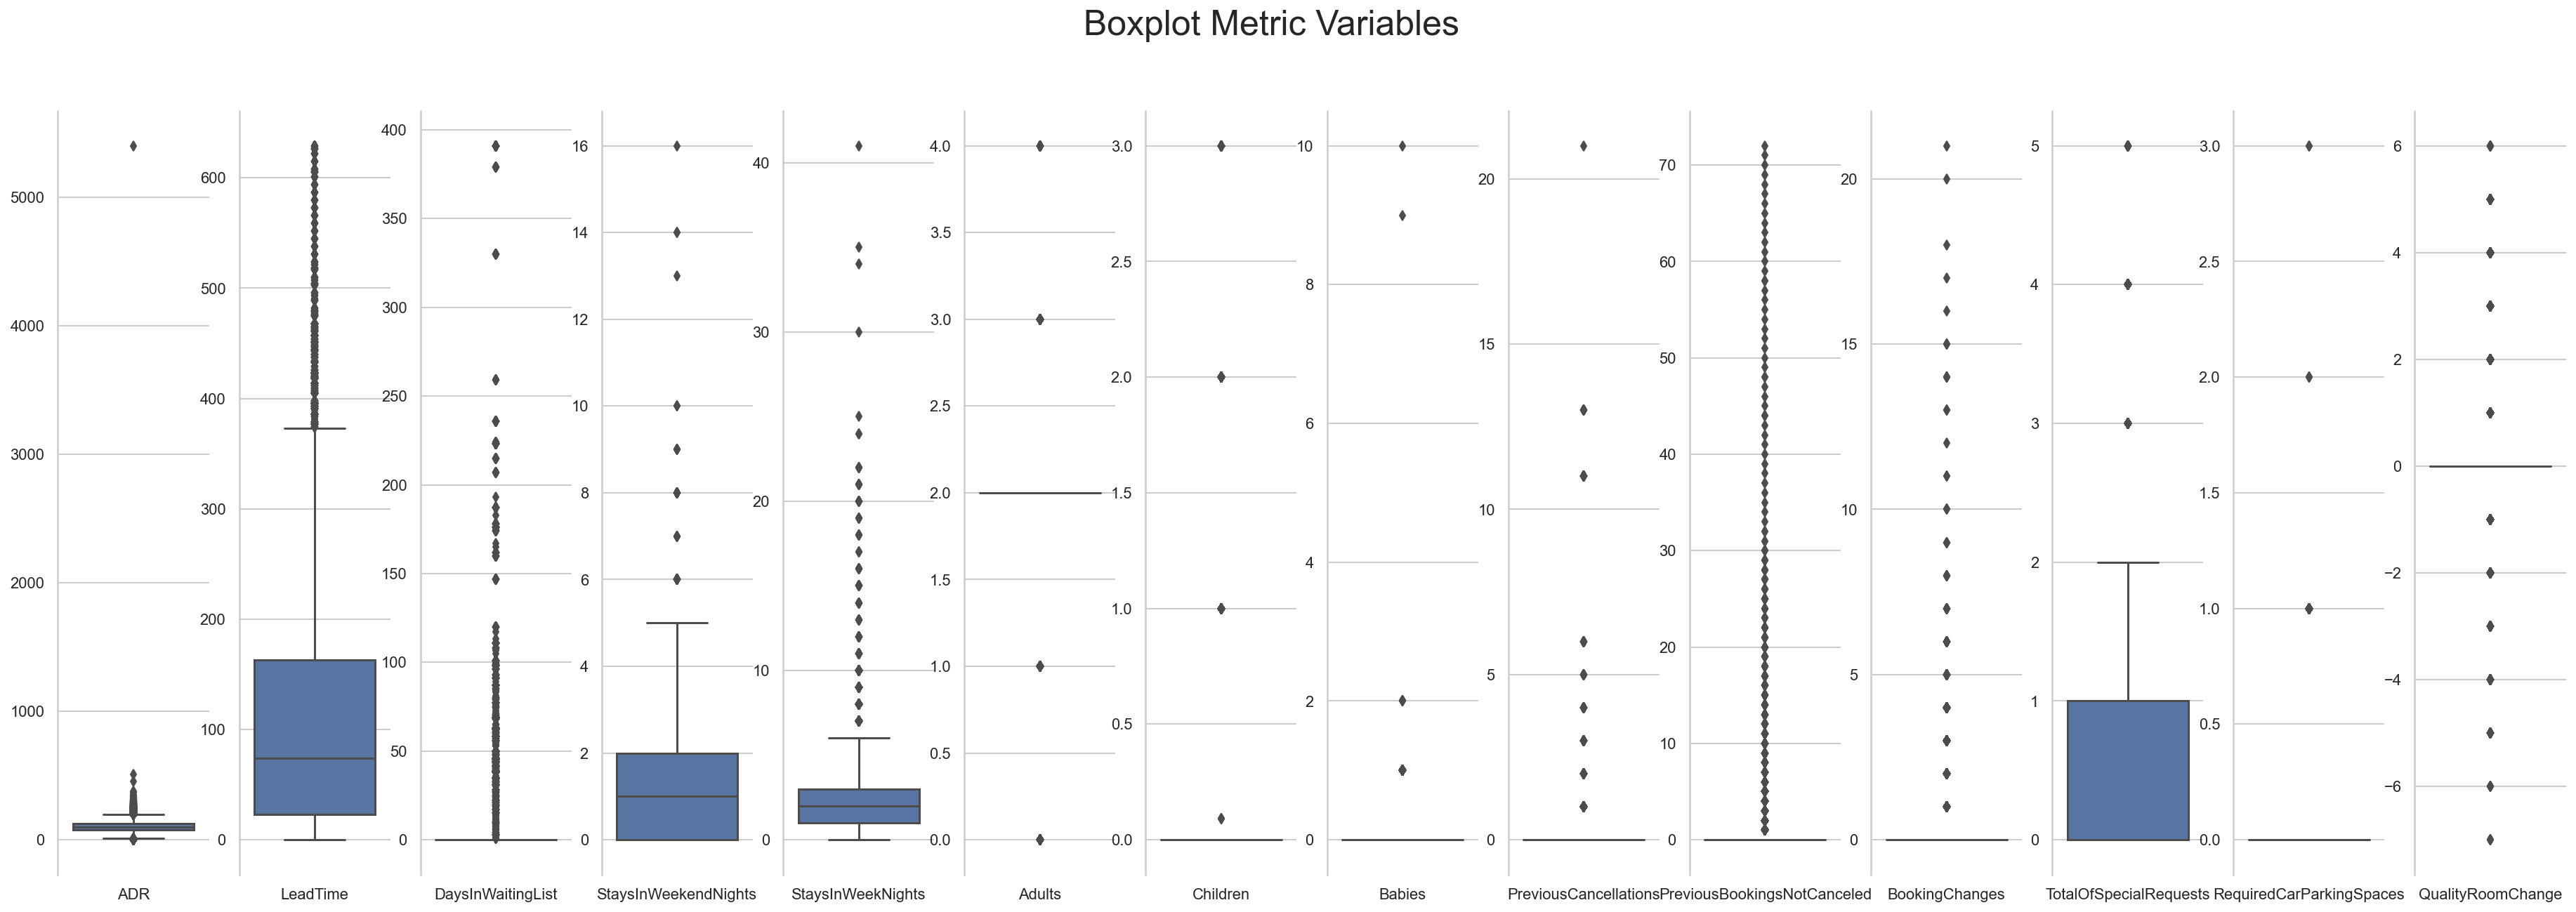

In [57]:
boxplotting(metric_data,'id','Boxplot Metric Variables')

Obs:
- ADR/Leadtime needs some normalization/outlier removal

In [58]:
metric_data.loc[(metric_data.ADR > 500)]

,id,ADR,LeadTime,DaysInWaitingList,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,TotalOfSpecialRequests,RequiredCarParkingSpaces,QualityRoomChange
8455,8455,5400.0,35,0,0,1,2,0.0,0,0,0,1,0,0,0
71343,71343,510.0,0,0,0,1,1,0.0,0,0,0,0,0,0,5


In [59]:
metric_data.drop(df.loc[df['ADR'] > 500].index, inplace=True)

In [60]:
non_metric_data

,id,MarketSegment,Agent,Company,DistributionChannel,Meal,CustomerType,IsRepeatedGuest,ReservedRoomType,AssignedRoomType
0,0,Offline TA/TO,0,1,TA/TO,HB,Transient,0,3,3
1,1,Online TA,0,1,TA/TO,BB,Transient,0,3,3
2,2,Online TA,0,1,TA/TO,BB,Transient,0,3,3
3,3,Online TA,0,1,TA/TO,BB,Transient,0,3,3
4,4,Online TA,0,1,TA/TO,BB,Transient,0,3,3
...,...,...,...,...,...,...,...,...,...,...
79325,79325,Offline TA/TO,0,1,TA/TO,BB,Transient,0,3,3
79326,79326,Online TA,0,1,TA/TO,BB,Transient,0,6,6
79327,79327,Online TA,0,1,TA/TO,BB,Transient,0,5,5
79328,79328,Online TA,0,1,TA/TO,BB,Transient,0,3,3


In [61]:
non_metric_data

,id,MarketSegment,Agent,Company,DistributionChannel,Meal,CustomerType,IsRepeatedGuest,ReservedRoomType,AssignedRoomType
0,0,Offline TA/TO,0,1,TA/TO,HB,Transient,0,3,3
1,1,Online TA,0,1,TA/TO,BB,Transient,0,3,3
2,2,Online TA,0,1,TA/TO,BB,Transient,0,3,3
3,3,Online TA,0,1,TA/TO,BB,Transient,0,3,3
4,4,Online TA,0,1,TA/TO,BB,Transient,0,3,3
...,...,...,...,...,...,...,...,...,...,...
79325,79325,Offline TA/TO,0,1,TA/TO,BB,Transient,0,3,3
79326,79326,Online TA,0,1,TA/TO,BB,Transient,0,6,6
79327,79327,Online TA,0,1,TA/TO,BB,Transient,0,5,5
79328,79328,Online TA,0,1,TA/TO,BB,Transient,0,3,3


In [62]:
non_metric_data.drop([4781,46760], inplace = True)

In [63]:
target_variable.drop([4781,46760], inplace = True)

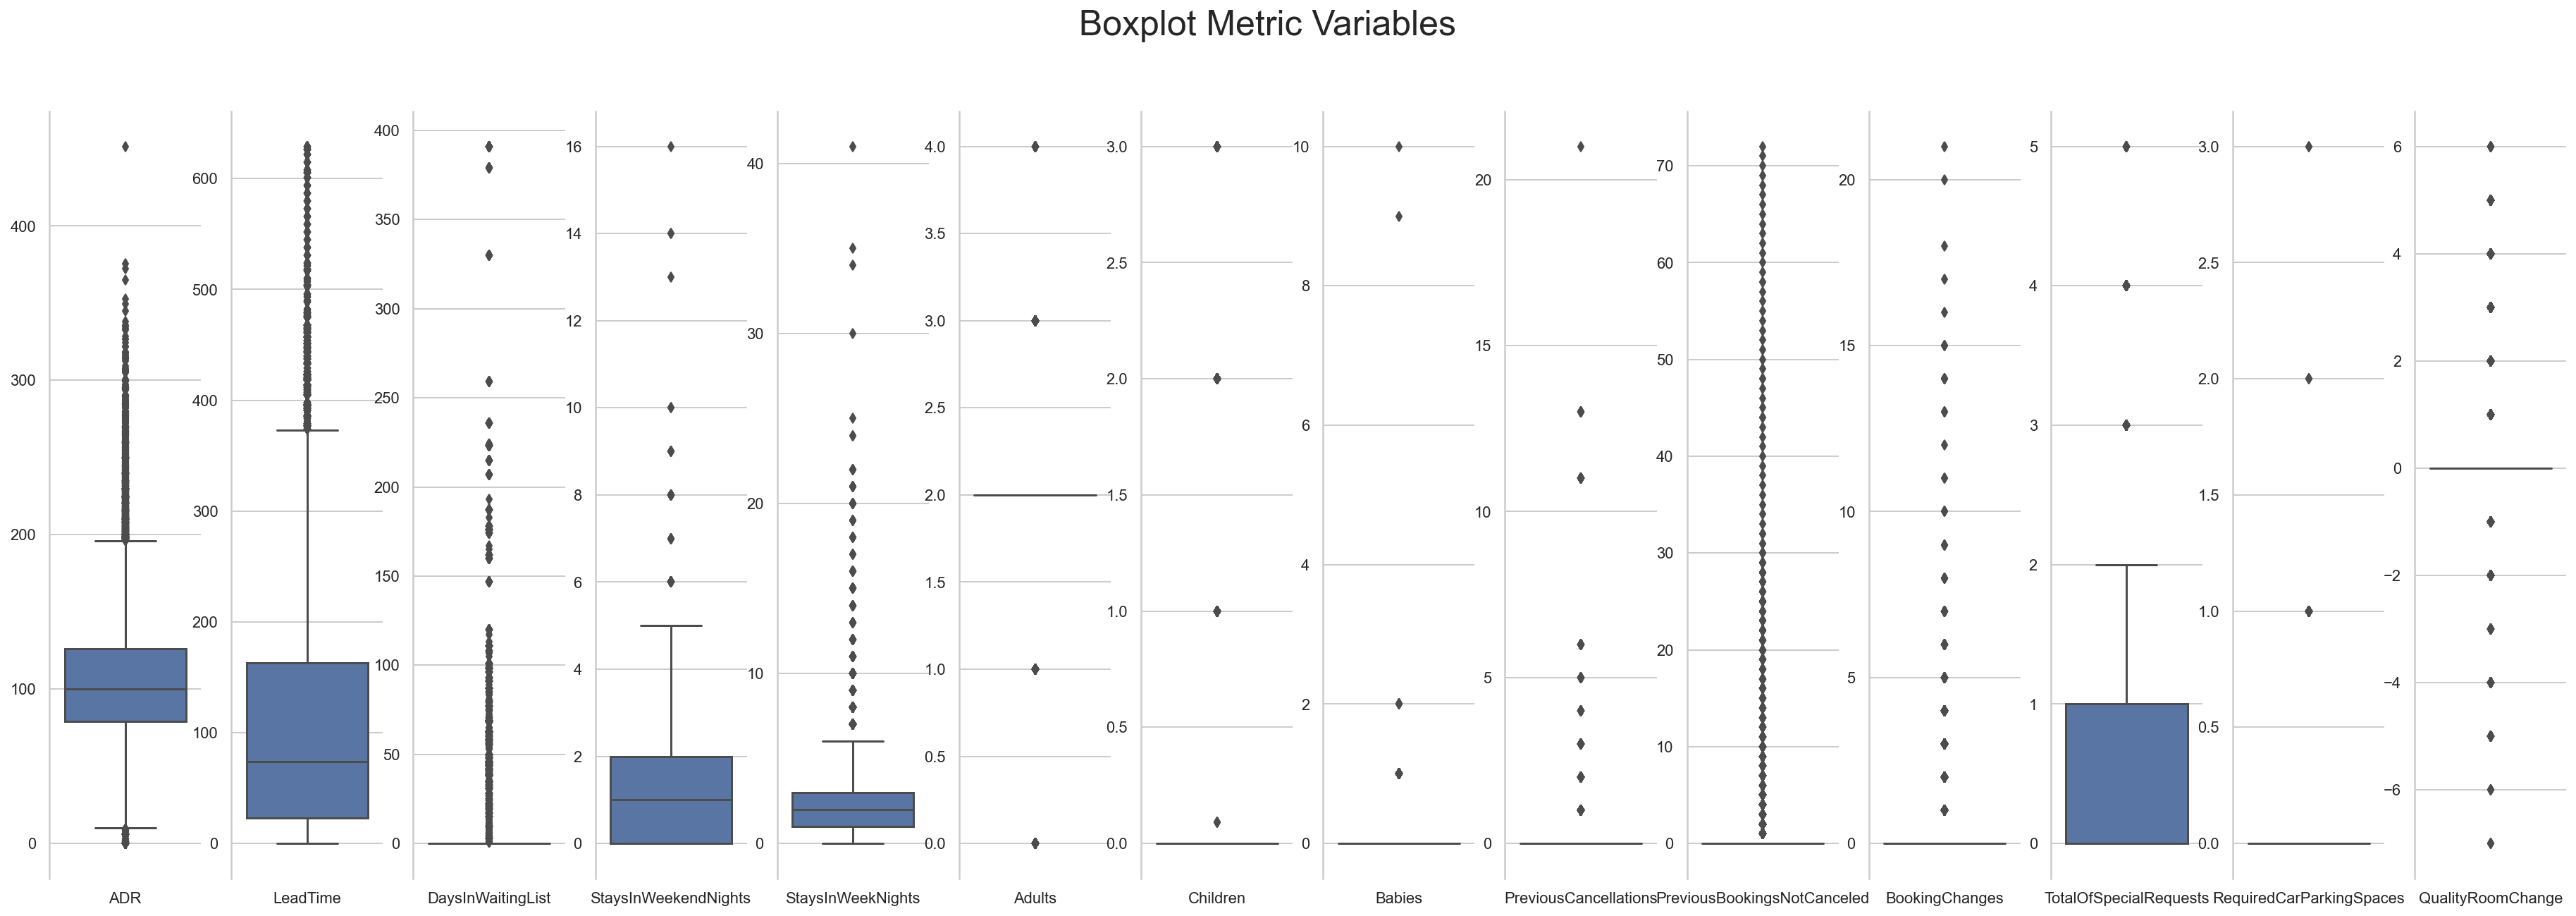

In [64]:
boxplotting(metric_data,'id','Boxplot Metric Variables')

In [65]:
def outlier_detective(dataset, technique):
    detective = technique
    labels = detective.fit_predict(dataset)
    data = pd.DataFrame()
    data['Outlier'] = labels
    return data['Outlier']

In [66]:
def outlier_index(variable):
    df_cluster=pd.DataFrame(variable)
    ind_outlier=df_cluster.index[df_cluster['Outlier']==-1]
    return ind_outlier

**Isolation Forest**

In [67]:
iso = outlier_detective(metric_data, IsolationForest(contamination=0.1))
index_iso = outlier_index(iso)
print(len(index_iso))

7933


**LocalOutlierFactor**

In [68]:
lof = outlier_detective(metric_data, LocalOutlierFactor(n_neighbors=50, contamination="auto",metric = 'manhattan'))
index_lof = outlier_index(lof)
print(len(index_lof))

4383


**OneSVM**

In [69]:
#ne_svm = outlier_detective(metric_data,OneClassSVM(gamma='auto'))
#index_one_svm = outlier_index(one_svm)
#print(len(index_one_svm))

Didn't work very well and it's too expensive in terms of time/performance

**Envelop**

In [70]:
envelop = outlier_detective(metric_data,EllipticEnvelope(random_state=0))
index_envelop = outlier_index(envelop)
print(len(index_envelop))

7933


In [71]:
metric_data.iloc[index_lof]

,id,ADR,LeadTime,DaysInWaitingList,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,TotalOfSpecialRequests,RequiredCarParkingSpaces,QualityRoomChange
0,0,0.00,6,0,0,2,1,0.0,0,0,0,0,0,0,0
86,86,138.50,3,0,2,1,3,0.0,0,0,0,0,0,0,0
112,112,138.50,3,0,2,1,3,0.0,0,0,0,0,0,0,0
134,134,0.00,0,0,0,1,2,0.0,0,0,0,0,0,0,4
139,139,0.00,0,0,2,5,2,0.0,0,0,0,4,0,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79200,79200,128.10,292,0,4,8,2,0.0,0,0,0,0,2,0,0
79233,79233,189.00,243,0,0,3,2,2.0,0,0,0,0,3,0,0
79236,79236,102.38,303,0,0,4,1,0.0,0,0,0,0,2,0,0
79237,79237,170.80,332,0,0,2,2,0.0,0,0,0,4,2,0,2


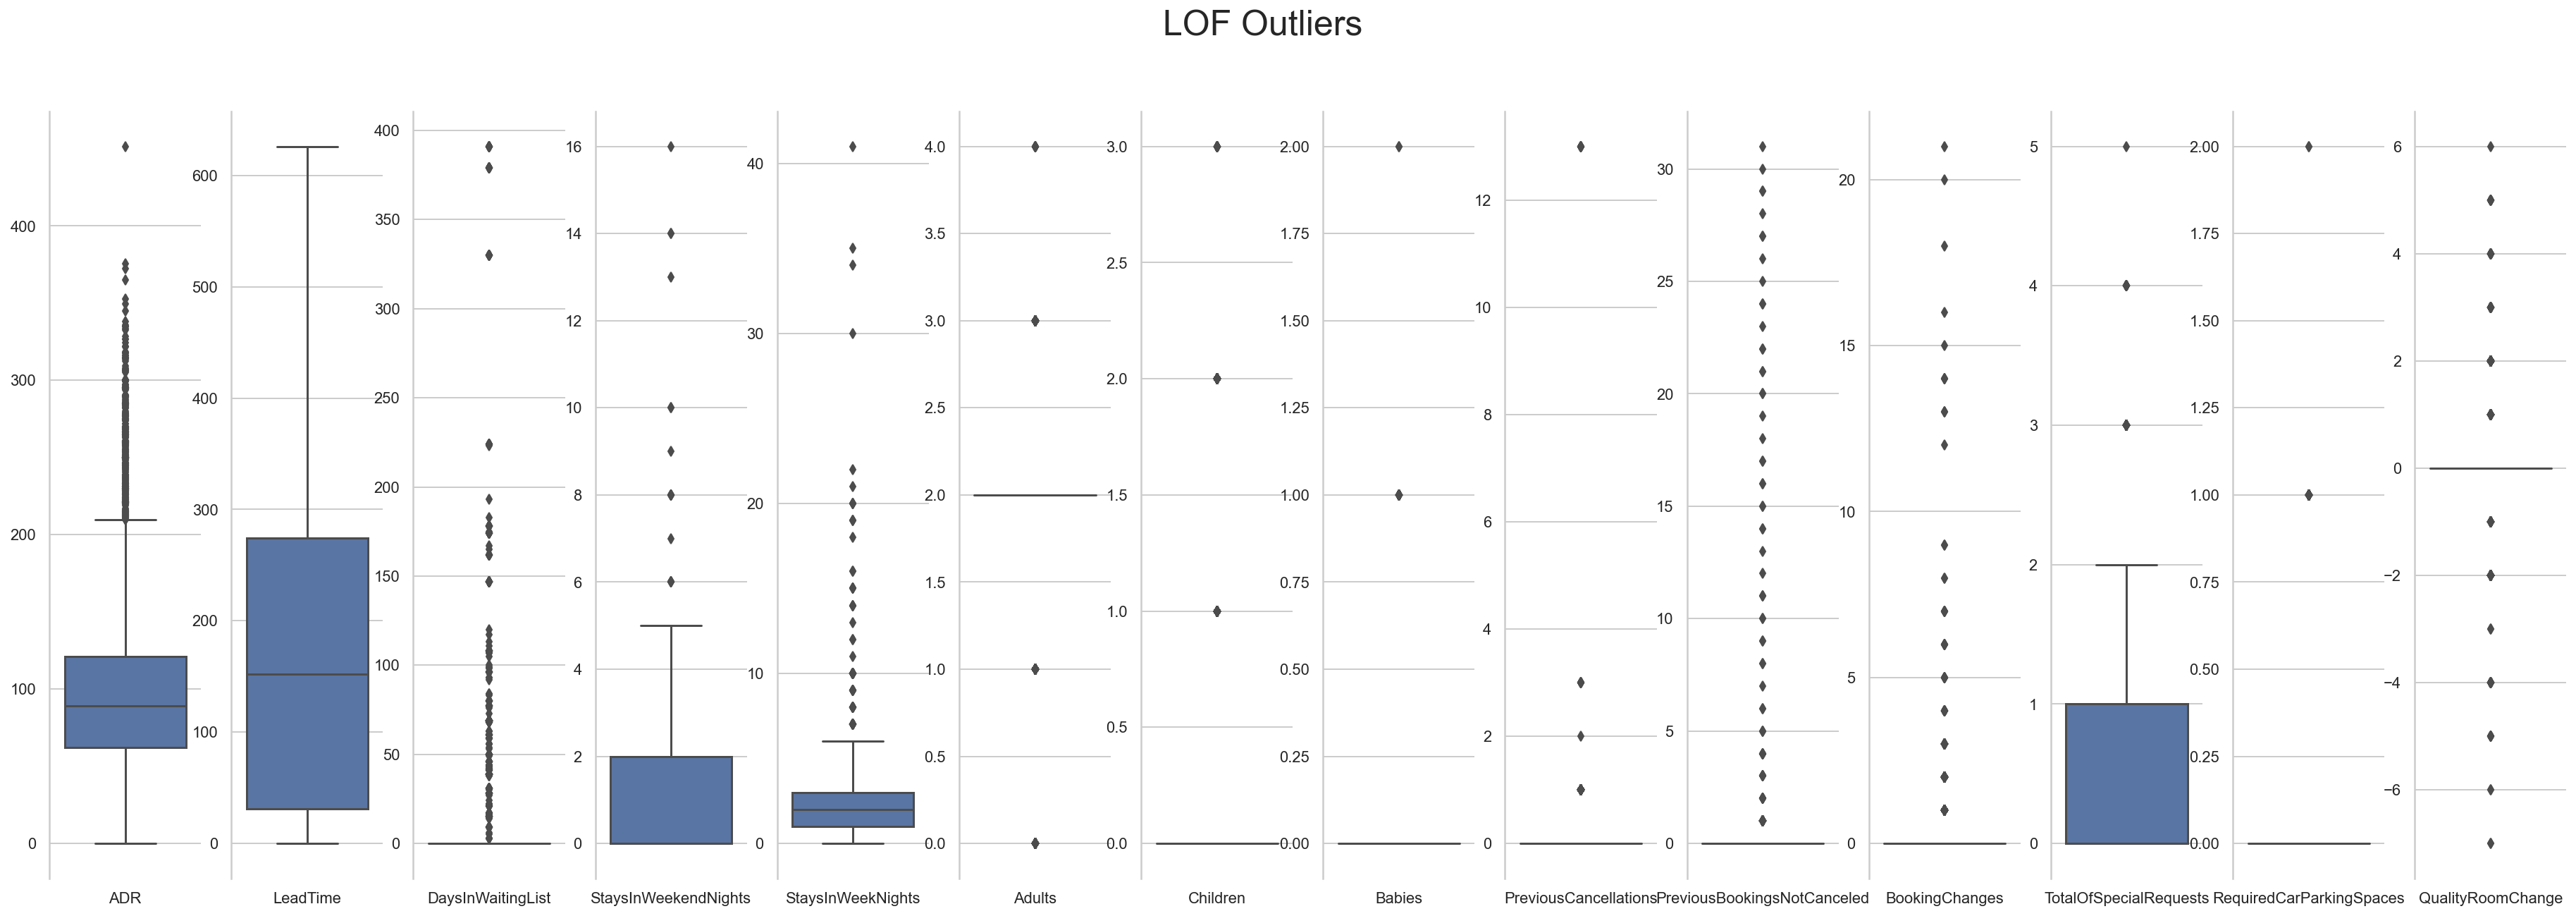

In [72]:
boxplotting(metric_data.iloc[index_lof], 'id', 'LOF Outliers ')

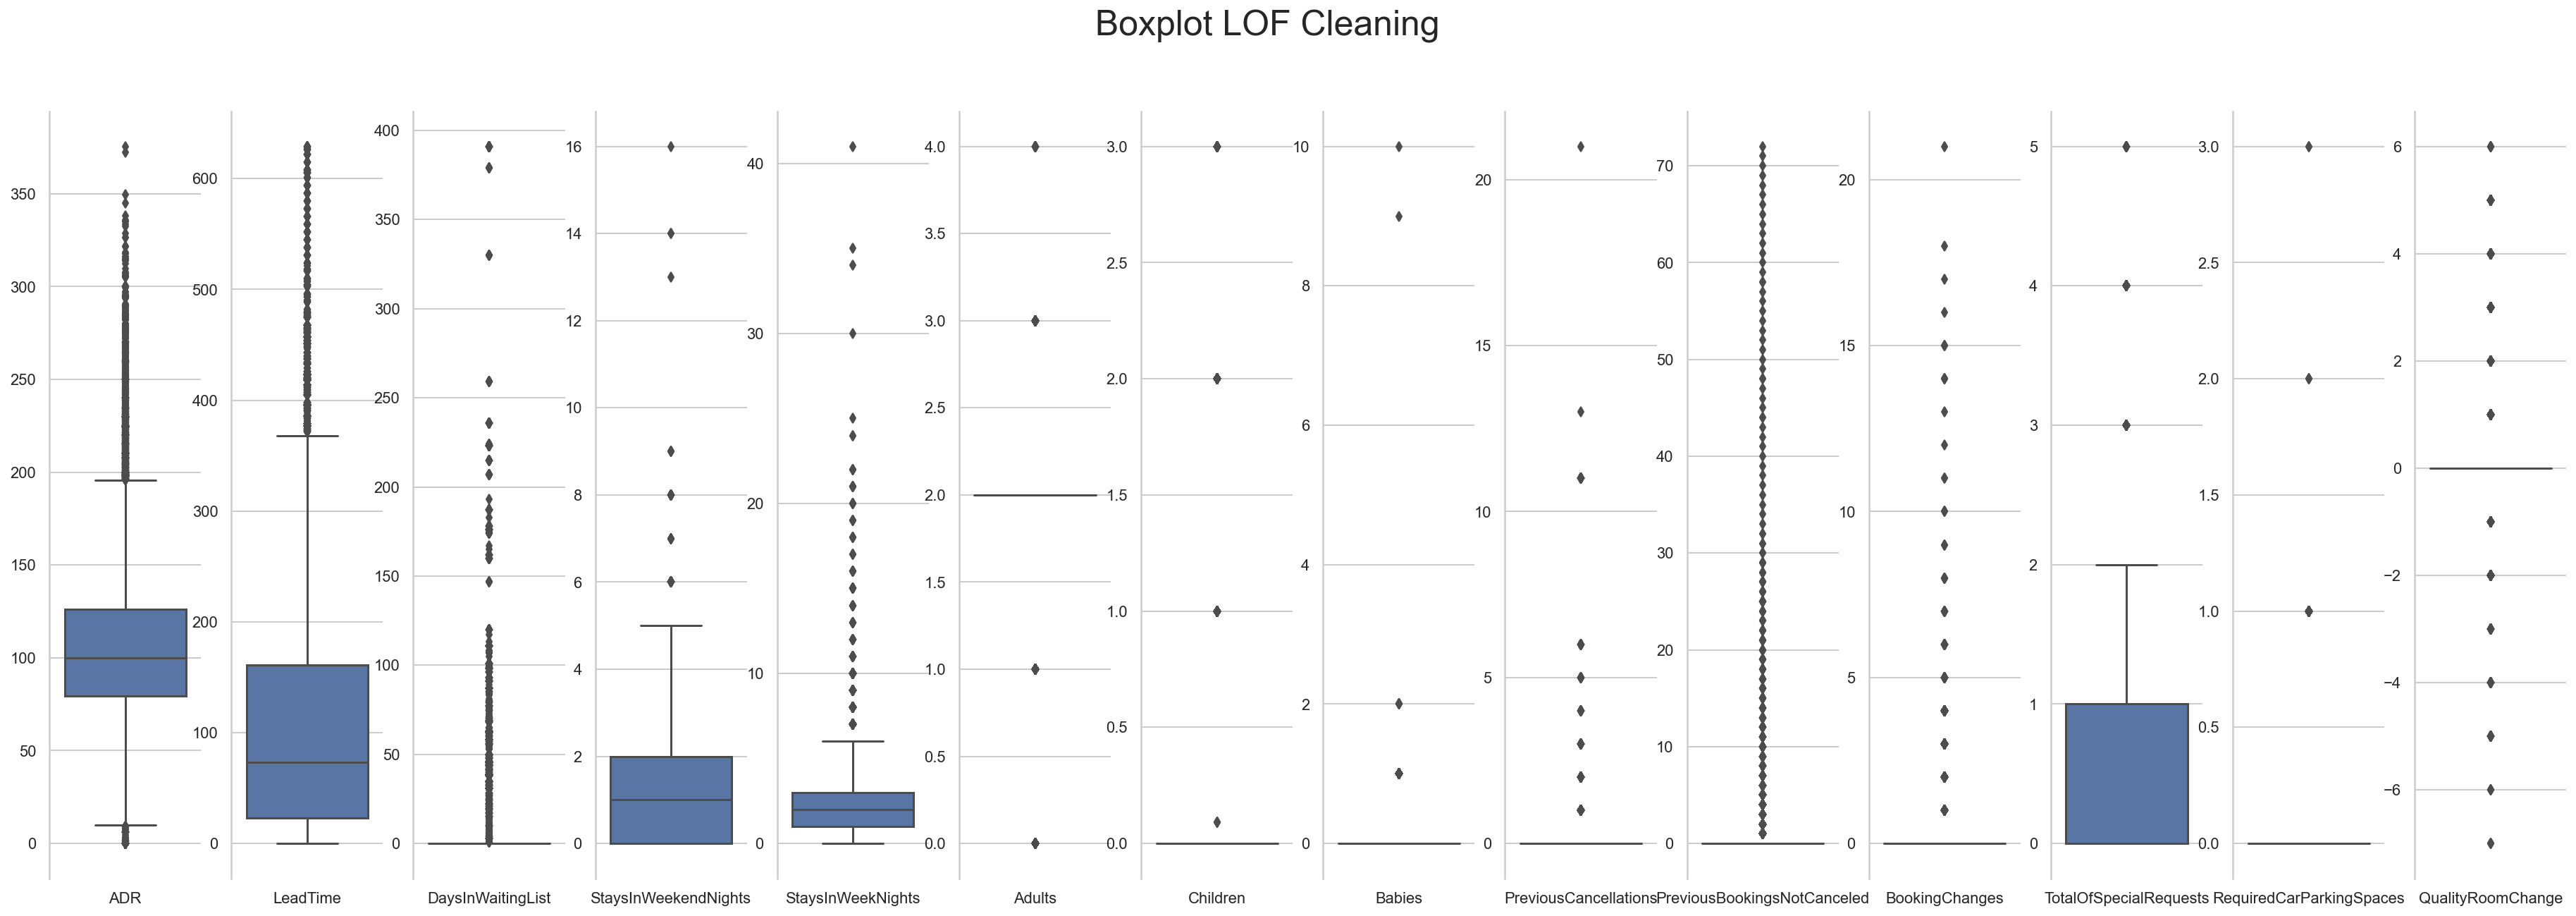

In [73]:
boxplotting(metric_data.drop(index_lof),'id','Boxplot LOF Cleaning')

After observing both plotting, it's not justified to consider those clients outliers --> only in feature Lead time we can see some difference

#### 3.3.5 Data normalization

In [74]:
metric_data.drop(index_lof, inplace = True)

In [75]:
metric_data

,id,ADR,LeadTime,DaysInWaitingList,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,TotalOfSpecialRequests,RequiredCarParkingSpaces,QualityRoomChange
1,1,76.50,88,0,0,4,2,0.0,0,0,0,0,1,0,0
2,2,68.00,65,0,0,4,1,0.0,0,0,0,0,1,0,0
3,3,76.50,92,0,2,4,2,0.0,0,0,0,0,2,0,0
4,4,76.50,100,0,0,2,2,0.0,0,0,0,0,1,0,0
5,5,76.50,79,0,0,3,2,0.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,79325,96.14,23,0,2,5,2,0.0,0,0,0,0,0,0,0
79326,79326,225.43,102,0,2,5,3,0.0,0,0,0,0,2,0,0
79327,79327,157.71,34,0,2,5,2,0.0,0,0,0,0,4,0,0
79328,79328,104.40,109,0,2,5,2,0.0,0,0,0,0,0,0,0


In [76]:
non_metric_data.drop(index_lof, inplace = True)

In [77]:
target_variable.drop(index_lof, inplace = True)

In [78]:
non_metric_data

,id,MarketSegment,Agent,Company,DistributionChannel,Meal,CustomerType,IsRepeatedGuest,ReservedRoomType,AssignedRoomType
1,1,Online TA,0,1,TA/TO,BB,Transient,0,3,3
2,2,Online TA,0,1,TA/TO,BB,Transient,0,3,3
3,3,Online TA,0,1,TA/TO,BB,Transient,0,3,3
4,4,Online TA,0,1,TA/TO,BB,Transient,0,3,3
5,5,Online TA,0,1,TA/TO,BB,Transient,0,3,3
...,...,...,...,...,...,...,...,...,...,...
79325,79325,Offline TA/TO,0,1,TA/TO,BB,Transient,0,3,3
79326,79326,Online TA,0,1,TA/TO,BB,Transient,0,6,6
79327,79327,Online TA,0,1,TA/TO,BB,Transient,0,5,5
79328,79328,Online TA,0,1,TA/TO,BB,Transient,0,3,3


In [79]:
#MinMaxScaler,StandardScaler,RobustScaler

def normalizer(data,method):
    normalized_data = method().fit_transform(data)
    data_scaled = pd.DataFrame(normalized_data, columns = data.columns, index = data.index)
    return data_scaled

In [80]:
metric_data.set_index('id', inplace = True)

In [81]:
data_scaled = normalizer(metric_data,MinMaxScaler)

In [82]:
data_scaled

,ADR,LeadTime,DaysInWaitingList,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,TotalOfSpecialRequests,RequiredCarParkingSpaces,QualityRoomChange
id,,,,,,,,,,,,,,
1,0.203728,0.139905,0.0,0.000,0.097561,0.50,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.538462
2,0.181092,0.103339,0.0,0.000,0.097561,0.25,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.538462
3,0.203728,0.146264,0.0,0.125,0.097561,0.50,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.538462
4,0.203728,0.158983,0.0,0.000,0.048780,0.50,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.538462
5,0.203728,0.125596,0.0,0.000,0.073171,0.50,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.256032,0.036566,0.0,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462
79326,0.600346,0.162162,0.0,0.125,0.121951,0.75,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.538462
79327,0.420000,0.054054,0.0,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.538462


#### 3.3.6 Data Encoding

In [83]:
non_metric_data.drop(['ReservedRoomType','AssignedRoomType'],axis = 1, inplace = True)

**OneHotEncoding**

In [84]:
non_metric_data.set_index('id', inplace = True)

In [85]:
ohc = OneHotEncoder(sparse=False, drop = None)
ohc_feat = ohc.fit_transform(non_metric_data)
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=non_metric_data.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

,x0_Aviation,x0_Complementary,x0_Corporate,x0_Direct,x0_Groups,x0_Offline TA/TO,x0_Online TA,x0_Undefined,x1_0,x1_1,...,x4_BB,x4_FB,x4_HB,x4_SC,x5_Contract,x5_Group,x5_Transient,x5_Transient-Party,x6_0,x6_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79326,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79327,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [86]:
target_variable.set_index('id', inplace = True)

In [87]:
all_data = pd.concat([data_scaled, ohc_df], axis = 1)

In [88]:
all_data = pd.concat([all_data, target_variable], axis = 1)

In [89]:
all_data

,ADR,LeadTime,DaysInWaitingList,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,...,x4_FB,x4_HB,x4_SC,x5_Contract,x5_Group,x5_Transient,x5_Transient-Party,x6_0,x6_1,IsCanceled
id,,,,,,,,,,,,,,,,,,,,,
1,0.203728,0.139905,0.0,0.000,0.097561,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.181092,0.103339,0.0,0.000,0.097561,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.203728,0.146264,0.0,0.125,0.097561,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.203728,0.158983,0.0,0.000,0.048780,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,0.203728,0.125596,0.0,0.000,0.073171,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.256032,0.036566,0.0,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
79326,0.600346,0.162162,0.0,0.125,0.121951,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
79327,0.420000,0.054054,0.0,0.125,0.121951,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### 3.3.7 Feature Selection 

#### 3.3.7.1 PhiK

In [90]:
def phik_heatmap(dataset):
    phik = dataset.phik_matrix()

    mask = np.zeros_like(phik, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    f, ax = plt.subplots(figsize=(30, 25)) 
    heatmap = sns.heatmap(phik, 
                          square = True,
                          mask = mask,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .6, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          fmt='.2g',
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 10})
    #add the column names as labels
    ax.set_yticklabels(phik.columns, rotation = 0)
    ax.set_xticklabels(phik.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

interval columns not set, guessing: ['ADR', 'LeadTime', 'DaysInWaitingList', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'TotalOfSpecialRequests', 'RequiredCarParkingSpaces', 'QualityRoomChange', 'x0_Aviation', 'x0_Complementary', 'x0_Corporate', 'x0_Direct', 'x0_Groups', 'x0_Offline TA/TO', 'x0_Online TA', 'x0_Undefined', 'x1_0', 'x1_1', 'x2_0', 'x2_1', 'x3_Corporate', 'x3_Direct', 'x3_GDS', 'x3_TA/TO', 'x3_Undefined', 'x4_BB       ', 'x4_FB       ', 'x4_HB       ', 'x4_SC       ', 'x5_Contract', 'x5_Group', 'x5_Transient', 'x5_Transient-Party', 'x6_0', 'x6_1', 'IsCanceled']


locator: <matplotlib.ticker.FixedLocator object at 0x7f3e92fec310>
Using auto colorbar locator <matplotlib.ticker.FixedLocator object at 0x7f3e92fec310> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05

findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (Georgia_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) 

findfont: score(<Font 'Times New Roman' (Times_New_Roman.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-BoldOblique.otf) oblique normal 700 condensed>) = 11.535
findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 4.05
findfont: score(<Font 'KacstTitleL' (KacstTitleL.ttf) normal normal 40

findfont: score(<Font 'Kinnari' (Kinnari-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Regular.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (Verdana_Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.

findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Arial ('/usr/share/fonts/truetype/msttcorefonts/Arial.ttf') with score of 0.050000.
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


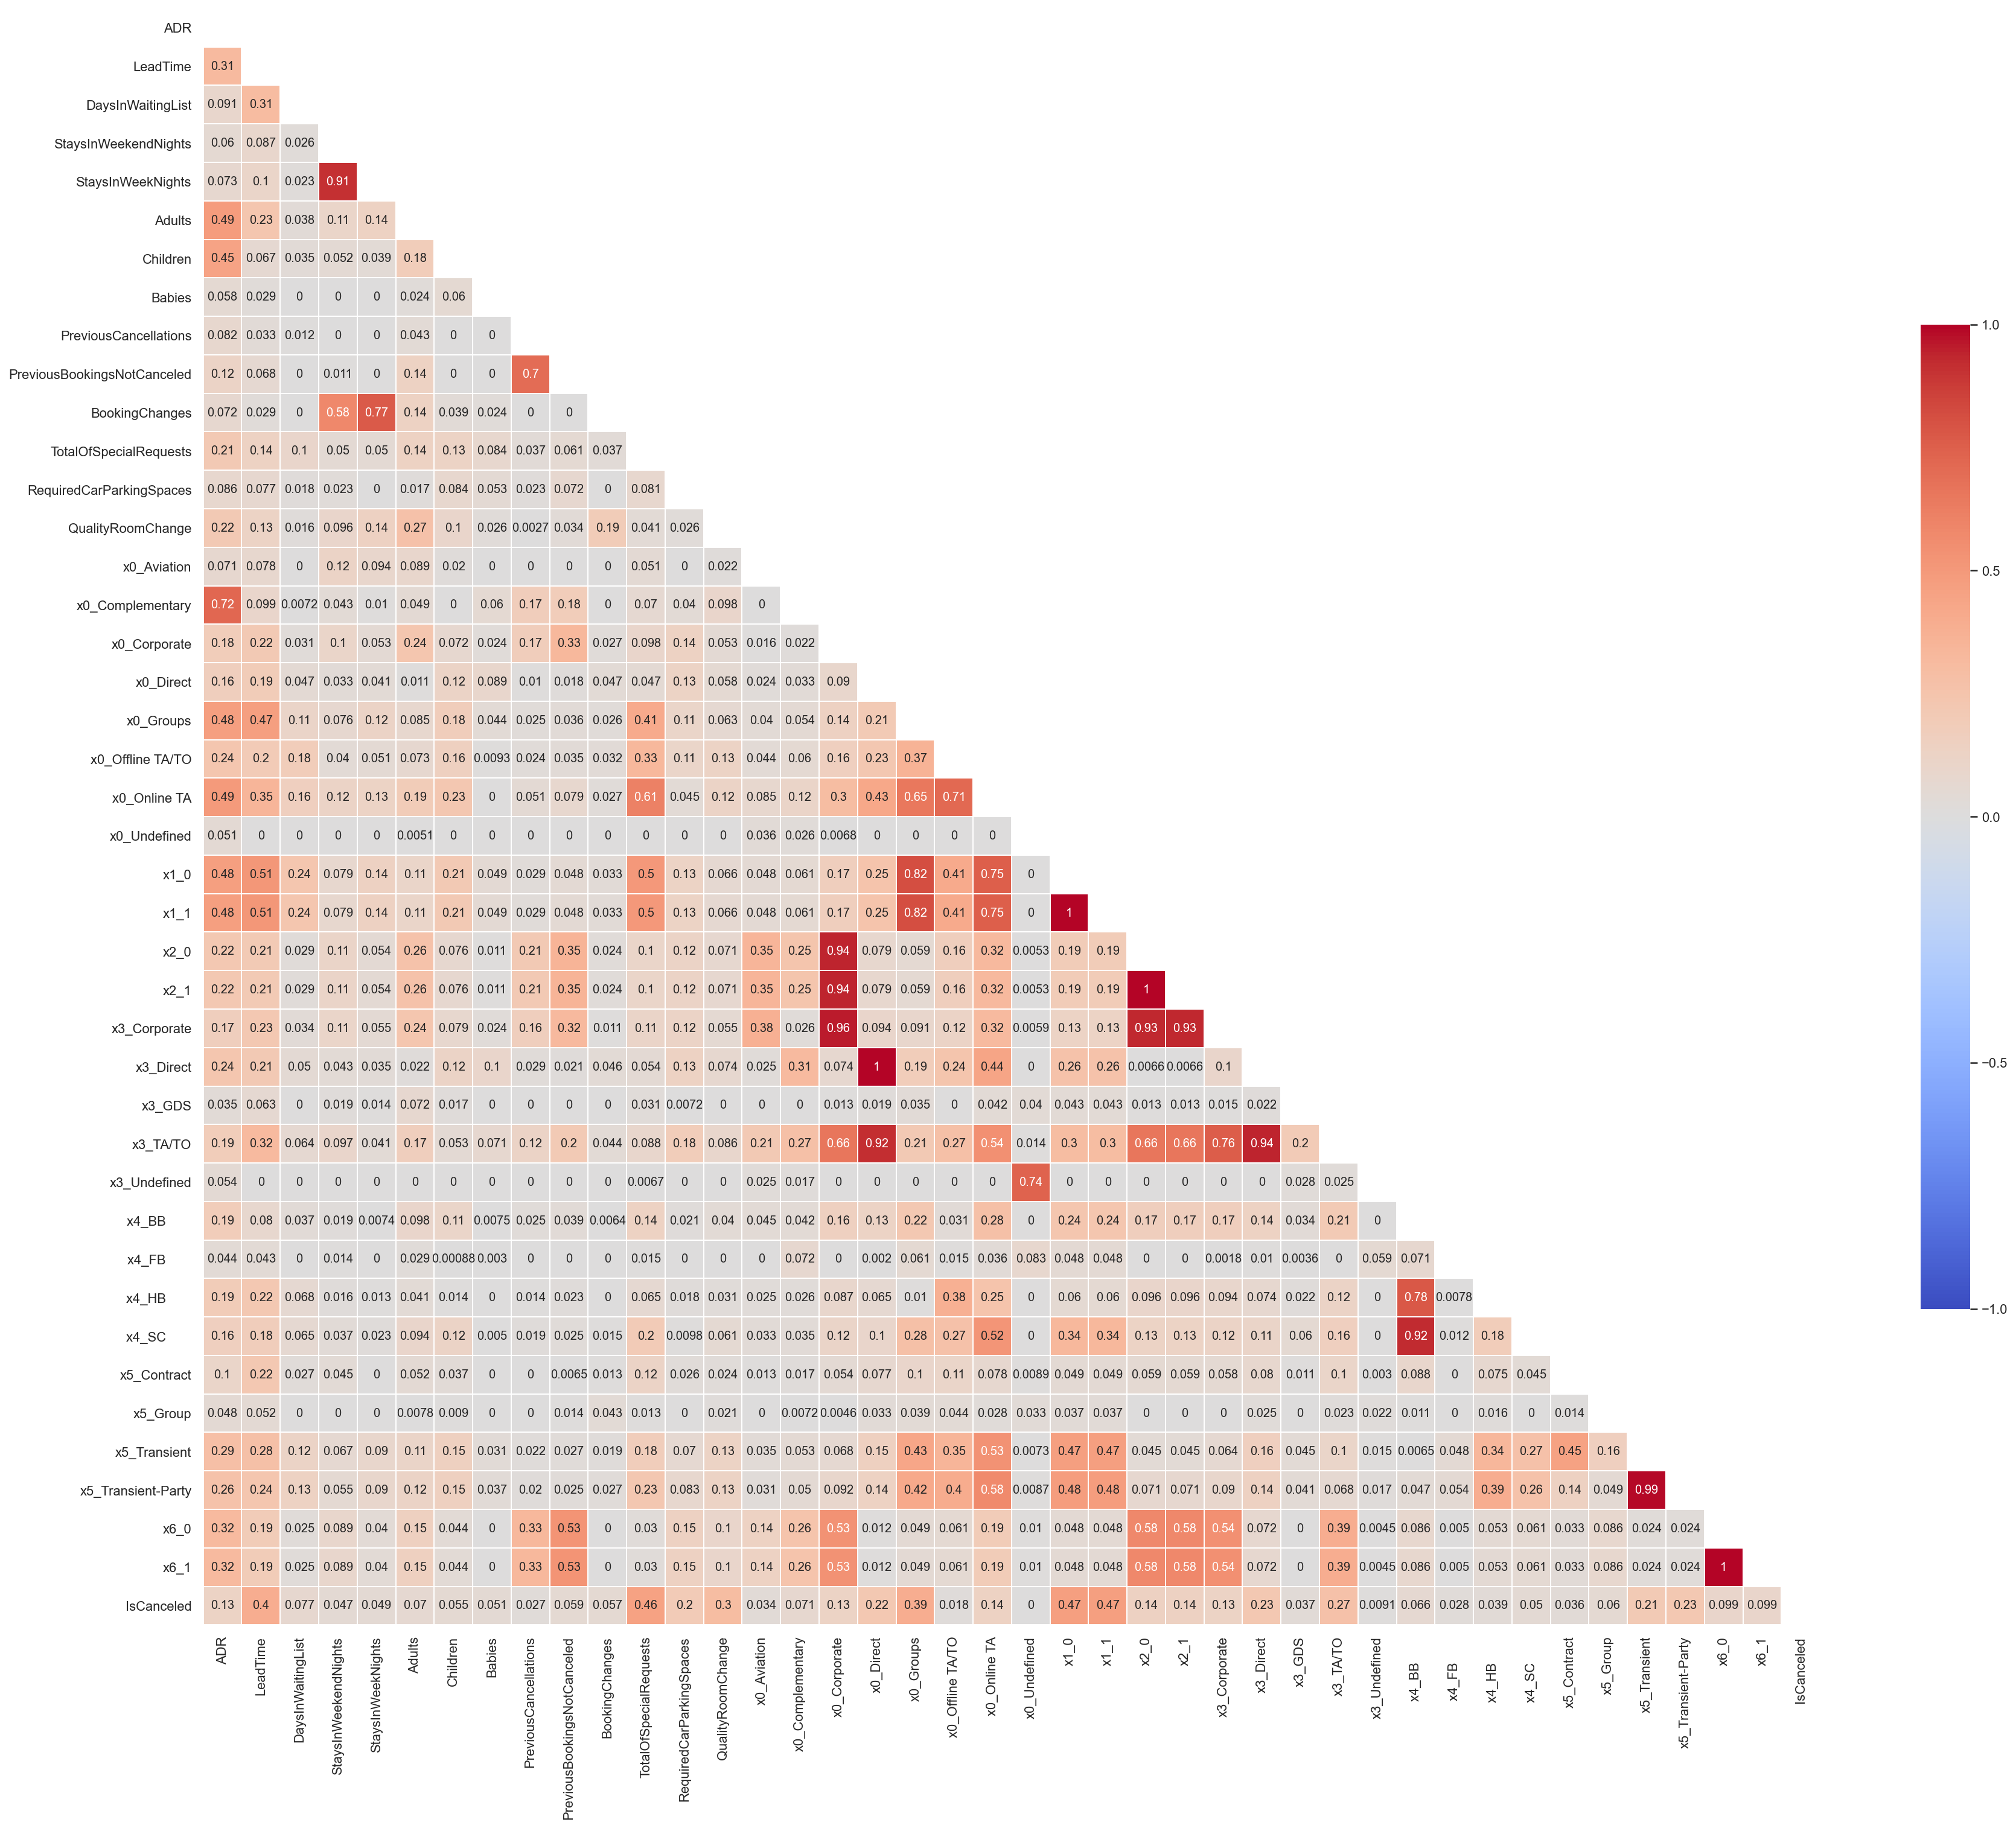

In [91]:
phik_heatmap(all_data)

In [97]:
corr_matrix = all_data.phik_matrix()
corr_matrix['IsCanceled'].sort_values(ascending=False)

interval columns not set, guessing: ['ADR', 'LeadTime', 'DaysInWaitingList', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'TotalOfSpecialRequests', 'RequiredCarParkingSpaces', 'QualityRoomChange', 'x0_Aviation', 'x0_Complementary', 'x0_Corporate', 'x0_Direct', 'x0_Groups', 'x0_Offline TA/TO', 'x0_Online TA', 'x0_Undefined', 'x1_0', 'x1_1', 'x2_0', 'x2_1', 'x3_Corporate', 'x3_Direct', 'x3_GDS', 'x3_TA/TO', 'x3_Undefined', 'x4_BB       ', 'x4_FB       ', 'x4_HB       ', 'x4_SC       ', 'x5_Contract', 'x5_Group', 'x5_Transient', 'x5_Transient-Party', 'x6_0', 'x6_1', 'IsCanceled']


IsCanceled                     1.000000
x1_0                           0.472421
x1_1                           0.472421
TotalOfSpecialRequests         0.457942
LeadTime                       0.396274
x0_Groups                      0.390662
QualityRoomChange              0.297701
x3_TA/TO                       0.267293
x3_Direct                      0.226045
x5_Transient-Party             0.225514
x0_Direct                      0.223296
x5_Transient                   0.209232
RequiredCarParkingSpaces       0.200527
x2_1                           0.141994
x2_0                           0.141994
x0_Online TA                   0.135897
ADR                            0.130514
x0_Corporate                   0.128888
x3_Corporate                   0.126702
x6_1                           0.099358
x6_0                           0.099358
DaysInWaitingList              0.077442
x0_Complementary               0.070809
Adults                         0.069692
x4_BB                          0.065515


Obs:
- Meal feature categories might not be worth;
- Stays Weekends/Weeks not worth;
- Babies not worth;
- Booking Changes not worth
- Type of Deposit might not be worth;

All of those assumptions if we don't use any Decision Tree based algorithmn

From Phyk Correlation, Babies, StaysInWeekendNights and BookingChanges are almost useless o predictive if the booking is cancelled.

In [99]:
len(all_data[(all_data.IsCanceled == 1)]) / len(all_data)

0.41350554391770183

Cancelation Rate for entire dataset

### Customer Profiles 

In [ ]:
#non_metric_data.drop(['Company','DistributionChannel','Meal'],axis = 1, inplace = True)

In [ ]:
#metric_data.drop(['DaysInWaitingList','Babies'],axis = 1, inplace = True)

In [ ]:
#cat_final = pd.concat([non_metric_data, target_variable], axis = 1)
#cat_final

In [ ]:
#num_final = pd.concat([metric_data, target_variable], axis = 1)
#num_final

#### Cancelation Profiles

In [ ]:
#canceled_cat = cat_final.loc[cat_final['IsCanceled'] == 1]

In [ ]:
#canceled_num = num_final.loc[num_final['IsCanceled'] == 1]

In [ ]:
#canceled_num.groupby('IsCanceled').mean().T

In [ ]:
#canceled_cat.drop(['IsCanceled'],axis = 1, inplace = True)

In [ ]:
#canceled_cat.mode().T

#### Non Cancel Profiles

In [ ]:
#not_canceled_cat = cat_final.loc[cat_final['IsCanceled'] == 0]

In [ ]:
#not_canceled_num = num_final.loc[num_final['IsCanceled'] == 0]

In [ ]:
#not_canceled_num.groupby('IsCanceled').mean().T

In [ ]:
#not_canceled_cat.drop(['IsCanceled'],axis = 1, inplace = True)

In [ ]:
#not_canceled_cat.mode().T

## Modelling

In [102]:
all_data.dropna(axis = 0,inplace = True)

In [103]:
target = 'IsCanceled'
# feature set and targer set
X = all_data.drop('IsCanceled', axis = 1)
y = all_data['IsCanceled']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [105]:
ran_state = 10

models = []
#Logistic Regression
models.append(('LogRegression', LogisticRegression(solver='sag',C = 5, max_iter=1000,random_state=ran_state)))
# SGDC which is also a linear classisifer
models.append(('SGDC', SGDClassifier(loss='log',random_state=ran_state)))
#KNN
models.append(('KNN', KNeighborsClassifier()))
#Decision Tree 
models.append(('CART', DecisionTreeClassifier(random_state=ran_state)))
#Gaussian
models.append(('GaussianNB', GaussianNB()))
#Random Forest
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, max_features=3,random_state=ran_state)))
#Linear support Vector Machine 
models.append(('LinearSVC', LinearSVC(random_state=ran_state)))
# Gradient Boosting
models.append(('GradientBoost', GradientBoostingClassifier(random_state=ran_state)))
# AdaBoost
models.append(('AdaBoost', AdaBoostClassifier(random_state=ran_state)))
# Neural Network
models.append(('NeuralNetwork', MLPClassifier(random_state=ran_state))) 
# evalutate each model in turn
results = []
names = []
scores = {}
for name, model in models:
    # Set up kfold with number of splits = 10
    kfold = KFold(n_splits=10)
    # start counting time
    begin = time.perf_counter()
    # Run cross-validation on training set
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_micro')
    # finish counting time
    end = time.perf_counter()
    
    results.append(cv_results)
    names.append(name)
    # assign infomation
    avg_time = (end-begin)/10
    avg_score = round(np.mean(cv_results),4)
    std_score = round(np.std(cv_results),3)
    # assign infomation
    scores[name] = [avg_score, '+/-' + str(std_score), round(np.min(cv_results),4), round(np.max(cv_results),4) ,round(avg_time,3)]

final_score = pd.DataFrame.from_dict(scores,orient='index',columns=['Average score','Std', 'Min', 'Max', 'Average training time'])
final_score

,Average score,Std,Min,Max,Average training time
LogRegression,0.7822,+/-0.006,0.7739,0.7904,1.819
SGDC,0.7704,+/-0.006,0.7561,0.7776,0.244
KNN,0.8171,+/-0.003,0.8116,0.8233,6.400
CART,0.8154,+/-0.004,0.8098,0.8212,0.319
GaussianNB,0.6481,+/-0.026,0.5754,0.6718,0.048
RandomForest,0.8456,+/-0.003,0.8406,0.8500,5.313
LinearSVC,0.7807,+/-0.006,0.7712,0.7883,2.621
GradientBoost,0.8121,+/-0.006,0.8036,0.8222,6.515
AdaBoost,0.7931,+/-0.006,0.7844,0.8027,1.983
NeuralNetwork,0.8249,+/-0.004,0.8205,0.8324,107.184


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGener

findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (Georgia_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 5

findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 4.05
findfont: score(<Font 'KacstTitleL' (KacstTitleL.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kinnari' (Kinnari-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (Verdana_Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Kalapi' (Kalapi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
find

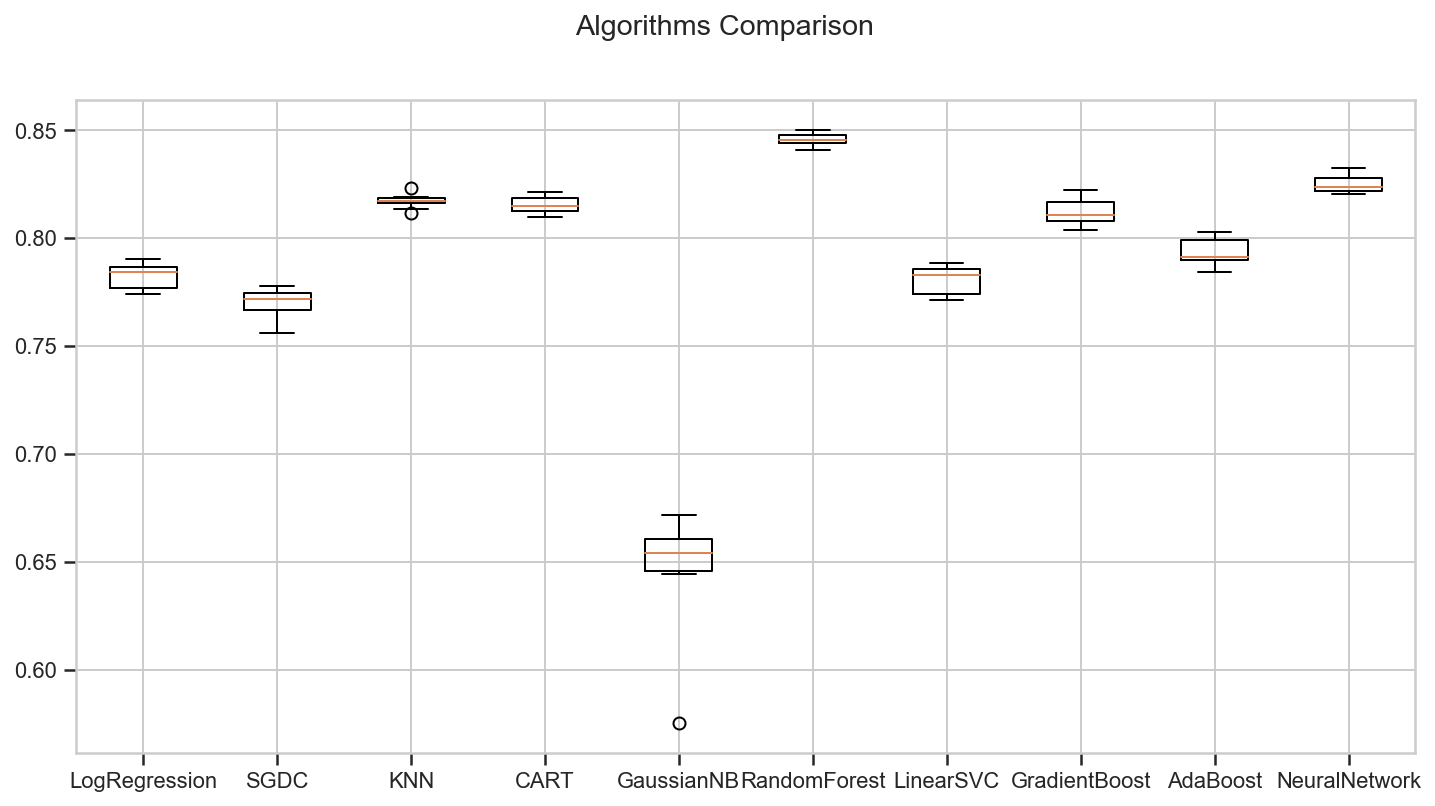

In [106]:
# Plot the result
fig = plt.figure()
fig.set_size_inches(12,6)
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
ax.grid(True)
plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) 

findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (Georgia_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 5

findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 4.05
findfont: score(<Font 'KacstTitleL' (KacstTitleL.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kinnari' (Kinnari-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (Verdana_Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Kalapi' (Kalapi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
find

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=9.0.
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) i

findfont: score(<Font 'Standard Symbols PS' (StandardSymbolsPS.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ubuntu' (Ubuntu-LI.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Norasi' (Norasi-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Georgia' (Georgia_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 5

findfont: score(<Font 'Chandas' (chandas1-2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 4.05
findfont: score(<Font 'KacstTitleL' (KacstTitleL.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kinnari' (Kinnari-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score

findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Samyak Malayalam' (Samyak-Malayalam.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Verdana' (Verdana_Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Kalapi' (Kalapi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
find

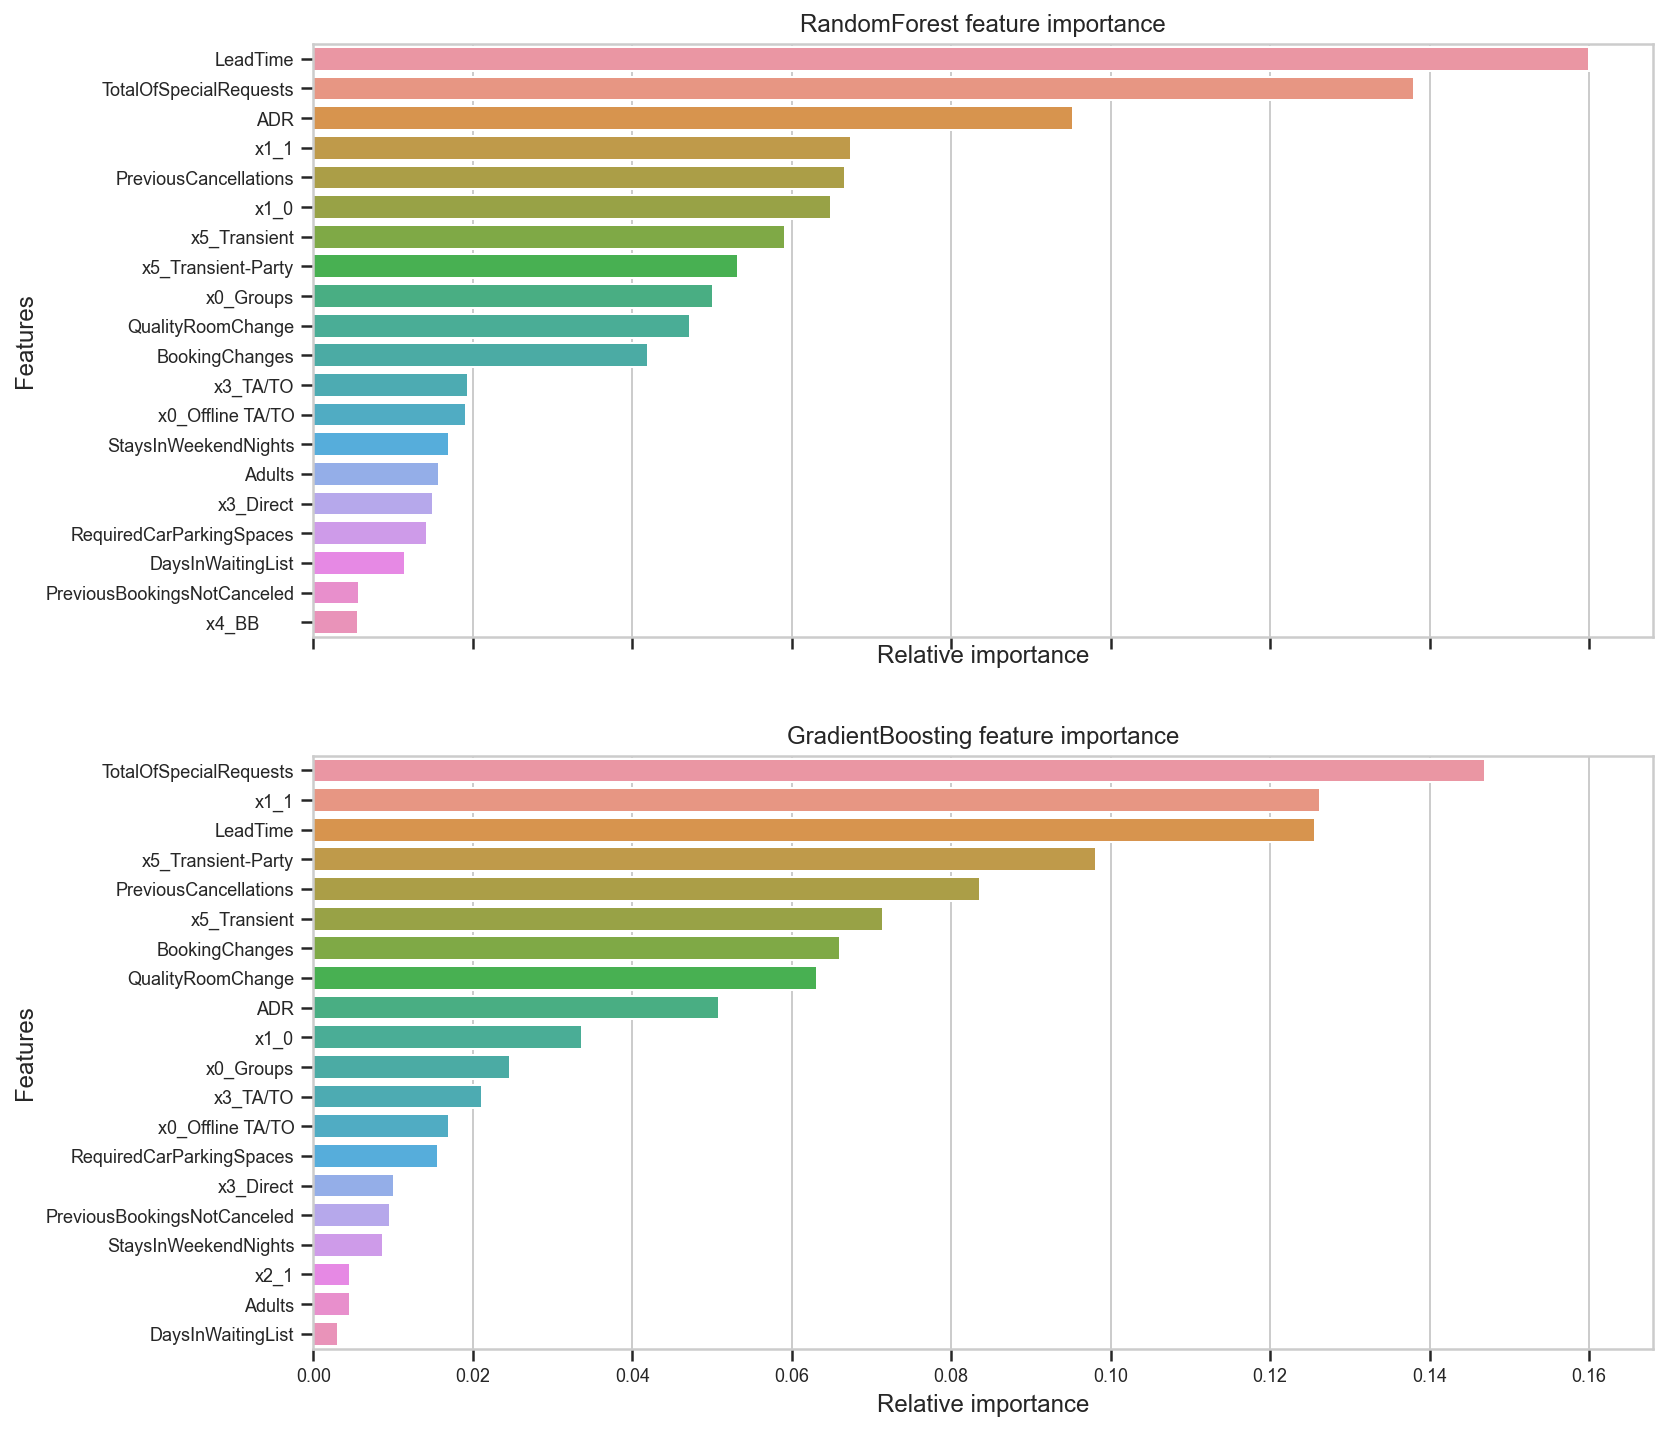

In [107]:
RFC_FS = RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=3, min_samples_split=3)
GBC_FS = GradientBoostingClassifier(max_depth=4, max_features=0.3, min_samples_leaf=100,n_estimators=300)

RFC_FS.fit(X_train,y_train)
GBC_FS.fit(X_train,y_train)

ncols = 1
nrows = 2

fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex="all", figsize=(12,12))

names_classifiers = [("RandomForest",RFC_FS),("GradientBoosting",GBC_FS)]

nclassifier = 0
for row in range(2):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:20]
    g = sns.barplot(y=X_train.columns[indices][:20],x = classifier.feature_importances_[indices][:20] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

In [108]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train,digits=4))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val,digits=4))
    print(confusion_matrix(y_val, pred_val))
    

def plot_models_roc_curve(models,X_train,y_train, X_test, y_test):
    fig ,ax = plt.subplots(figsize = (8,8))
    for model in models:
        model.fit(X_train, y_train)
        plot_roc_curve(model, X_test, y_test,ax = ax)      

    plt.title("ROC curve comparison")
    plt.show() 

## RF

In [109]:
RFC_final = RandomForestClassifier(bootstrap=False, max_depth=17, min_samples_split=10)
RFC_final.fit(X_train,y_train)
y_train_predicted = RFC_final.predict(X_train)
y_test_predicted = RFC_final.predict(X_test)

In [110]:
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0     0.8393    0.9297    0.8822     32822
         1.0     0.8837    0.7501    0.8115     23385

    accuracy                         0.8550     56207
   macro avg     0.8615    0.8399    0.8468     56207
weighted avg     0.8578    0.8550    0.8528     56207

[[30514  2308]
 [ 5843 17542]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [126]:
print("Training Random Forest score: {:.3f}".format(RFC_final.score(X_train, y_train)))
print("Test set score: {:.3f}".format(RFC_final.score(X_test, y_test)))

Training Random Forest score: 0.855
Test set score: 0.850


## GB

In [111]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier(random_state=10)
gb_param_grid = {'loss' : ["deviance", 'exponential'],
              'learning_rate': [0.1, 0.07,0.05,0.03, 0.01], 
              'n_estimators':[60,100,150,200,500,700], 
              'max_features':[7], 
              'subsample':[0.8],
              'min_samples_leaf':[15],
              'min_samples_split' : [120],
              'max_depth' :[4]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=KFold(n_splits=10), scoring="accuracy", n_jobs= -1, verbose = 1)
gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_
# Best score
gsGBC.best_score_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 55.6min finished


0.8352520099702374

In [112]:
GBC_final = GradientBoostingClassifier(learning_rate=0.1, 
                                 loss = 'deviance',
                                 max_depth=4, 
                                 max_features=7, 
                                 min_samples_leaf=15,                         
                                 min_samples_split=120,
                                 n_estimators=700, 
                                 subsample=0.8,
                                 warm_start = False,
                                 random_state = 10)
GBC_final.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=7, min_samples_leaf=15,
                           min_samples_split=120, n_estimators=700,
                           random_state=10, subsample=0.8)

In [113]:
y_train_predicted = GBC_final.predict(X_train)
y_test_predicted = GBC_final.predict(X_test)
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0     0.8274    0.9200    0.8712     32822
         1.0     0.8667    0.7306    0.7928     23385

    accuracy                         0.8412     56207
   macro avg     0.8470    0.8253    0.8320     56207
weighted avg     0.8437    0.8412    0.8386     56207

[[30195  2627]
 [ 6301 17084]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [114]:
gb_result = pd.DataFrame(gsGBC.cv_results_)
gb_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,4.792234,0.788112,0.030370,0.009793,0.1,deviance,4,7,15,120,...,0.805551,0.811066,0.809465,0.804483,0.820285,0.811388,0.807117,0.809970,0.005110,36
1,8.281464,0.464249,0.039021,0.010354,0.1,deviance,4,7,15,120,...,0.810532,0.812845,0.825120,0.812133,0.821886,0.815836,0.817794,0.816945,0.004810,23
2,10.885733,1.087347,0.045750,0.012853,0.1,deviance,4,7,15,120,...,0.814268,0.815157,0.827255,0.815157,0.826868,0.820463,0.823310,0.820236,0.004957,18
3,14.397517,1.176817,0.062351,0.017957,0.1,deviance,4,7,15,120,...,0.814980,0.821028,0.828322,0.818360,0.831139,0.821708,0.824911,0.822549,0.005089,14
4,40.963650,3.317625,0.138815,0.030842,0.1,deviance,4,7,15,120,...,0.829212,0.828500,0.837573,0.830101,0.838968,0.832918,0.836121,0.833259,0.004083,2


In [115]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = gsGBC.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))
#print('roc_auc_score: ', roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1]))

accuracy_score:  0.8421754910333049


In [116]:
print("Training Gradient Boosting score: {:.3f}".format(GBC_final.score(X_train, y_train)))
print("Test set score: {:.3f}".format(GBC_final.score(X_test, y_test)))

Training Gradient Boosting score: 0.841
Test set score: 0.842


## MLP

In [119]:
# Neural Network tunning
MLPC = MLPClassifier()
gb_param_grid = {'hidden_layer_sizes': [(50,50,50), (50,25), (100,25)],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd'],
                'learning_rate_init': list(np.linspace(0.0001,0.1,3)),
                'learning_rate': ['adaptive'],
                  'momentum' : [0.9,0.7],
                }

gsMLPC = GridSearchCV(MLPC,param_grid = gb_param_grid, cv=5, scoring="f1_micro", n_jobs= -1, verbose = 1)

gsMLPC.fit(X_train,y_train)

MPLC_best = gsMLPC.best_estimator_

# Best score
gsMLPC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 101.6min finished


0.8281174521542158

In [120]:
MLPC_final = MLPClassifier(hidden_layer_sizes = (100, 25),
                     activation = 'tanh',
                     solver = 'sgd',
                     learning_rate_init = 0.1,
                     learning_rate = 'adaptive',
                     batch_size = 'auto',
                     max_iter = 300,
                     momentum=0.7,
                     random_state=2)
MLPC_final.fit(X_train,y_train)
y_train_predicted = MLPC_final.predict(X_train)
y_test_predicted = MLPC_final.predict(X_test)

In [121]:
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0     0.8194    0.9115    0.8630     32822
         1.0     0.8525    0.7179    0.7795     23385

    accuracy                         0.8310     56207
   macro avg     0.8359    0.8147    0.8212     56207
weighted avg     0.8331    0.8310    0.8282     56207

[[29917  2905]
 [ 6596 16789]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [125]:
print("Training MLP score: {:.3f}".format(MLPC_final.score(X_train, y_train)))
print("Test set score: {:.3f}".format(MLPC_final.score(X_test, y_test)))

Training MLP score: 0.831
Test set score: 0.834


## Stacking

In [122]:
rf = RFC_final
#lr = LogR_final
nn = MLPC_final
gb = GBC_final

In [123]:
### Find the best combination of stacking

seed = 2
np.random.seed(seed)

names = ['Random Forest', 'Neuron Network', 'Gradient Boosting']
clf_array = [rf, nn, gb]

def zip_stacked_classifiers(clf_array, names):
    a = []
    clf_zip = []
    name_zip = []    
    for i in range(2, len(clf_array) + 1):
        combined_items = [list(x) for x in list(combinations(clf_array, i))]
        clf_zip = clf_zip+combined_items 
    for i in range(2, len(names) + 1):
        combined_items = [list(x) for x in list(combinations(names, i))]
        name_zip = name_zip+ combined_items    
    return list(zip(clf_zip,name_zip))

stacked_clf_list =zip_stacked_classifiers(clf_array, names)
best_combination = [0.00, ""]
accuracy_dict = {}
for clf in stacked_clf_list:   
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = seed, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(LogisticRegression())
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    accuracy_dict[str(clf[1])] = accuracy
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: %.4f - %s" %(accuracy, clf[1]))
    
print("\nBest stacking model is %s with accuracy of: %.4f" %(best_combination[1], best_combination[0]))

[MLENS] backend: threading


Accuracy score: 0.8502 - ['Random Forest', 'Neuron Network']
Accuracy score: 0.8508 - ['Random Forest', 'Gradient Boosting']
Accuracy score: 0.8422 - ['Neuron Network', 'Gradient Boosting']
Accuracy score: 0.8489 - ['Random Forest', 'Neuron Network', 'Gradient Boosting']

Best stacking model is ['Random Forest', 'Gradient Boosting'] with accuracy of: 0.8508


## End